# Create a Custom Pytorch Image Dataset

In this practical, we will be creating a custom image dataset for a classification problem, using a folder of images downloaded from Google Images. Inside the `Images` directory there are four subfolders, each corresponding to a type of animal. These will form the classes of our classifier, with the examples being the images contained in the subfolders.

In [1]:
#@title # Run the following cell to download the necessary files for this practical. { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

print('Downloading images.zip...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/practicals_files/6aefa2cd-3dc9-402d-b144-7e2c985a1168/images.zip -q
!unzip images.zip > /dev/null
!rm images.zip


In [2]:
# Run this code to import the necessary libraries.
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

Write a function to get the list of class names. The class names are the same as the subfolders of the `Images/` directory. The function should return a list of class names as strings.

In [8]:
import os 

def get_class_names():
    #TODO - Write a function to get a list of class names from the subfolder names inside `Images/`
    classnames = [x for x in os.listdir('images') if x != '.DS_Store' ]
    return classnames

animals_list=get_class_names()
print(animals_list)

['frog', 'owl', 'crab', 'horse']


Next we will create a class called "Animal" which will collect all the images from a given class.

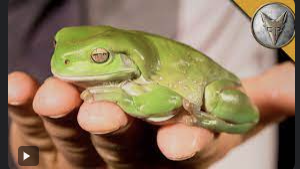

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=296x169 at 0x7F5820F58EE0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=270x175 at 0x7F5820F58E80>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=270x180 at 0x7F5820F58DC0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=180x175 at 0x7F5820F58220>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=282x179 at 0x7F5820F58040>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x169 at 0x7F5820F58BE0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=240x180 at 0x7F5820F583D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=270x180 at 0x7F5820F58940>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=272x180 at 0x7F5820F58BB0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=225x180 at 0x7F5820F58790>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=225x225 at 0x7F5820E96040>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=240x180 at 0x7F5820E96070>,
 <PIL.PngImagePl

In [15]:
import random

class Animal:
    def __init__(self, animal_name: str):

        #TODO - get a list of all the filepaths of the images inside the subfolder and assign to the attribute `self.images`. They should be of the format eg. `images/frog/img_10.png`
        image_names = os.listdir(f"images/{animal_name}")
        img_fps = [f"images/{animal_name}/{img_name}" for img_name in image_names if img_name != '.DS_Store']

        imgs = []
        for img_fp in img_fps:
          img = Image.open(img_fp)
          imgs.append(img)

        # print(img)
        img.show()
        self.images=imgs
        self.name = animal_name

    def show(self):
        #TODO - when called, this method should display a random example from the list of images.
        img = random.choice(self.images)
        display(img)


frog=Animal('frog')
frog.show()

frog.images

Now we need to create an encoder and decoder dictionary. These should map the class names to the integer class labels we will be using. Use dictionary comprehension to create these variables.

In [ ]:
encoder = None # TODO Create your encoder. The keys should be the class name, and the values the label eg. {'frog': 0}
decoder = None # TODO Import your decoder code. It should be the inverse of the encoder.

Next, we need to create an image transform. This can be achieved using the `transforms` module from the  `Torchvision` library. We will need to add transforms to resize the image and convert it to a `pytorch` tensor. You can read the docs for the `transforms` module to find the syntax for this.

In [ ]:
data_transform = transforms.Compose([
    # TODO - add a transform to resize the image to 256 x 256 pixels.
    transforms.Resize(100,100),
    # TODO - add a transform to convert the image to a pytorch tensor.
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Now we can put it all together into a dataset class that inherits from `torch.utils.Dataset`. 
1. Inside the class constructor: 
- Create an attribute called `self.animals` and assign it by calling the pre-defined `get_classes` method.
- Add the code from the encoder and decoder you defined above, assigning them to attributes called `self.encoder` and `self.decoder`.
- Complete the code inside the `for` loop, extending the attribute `self.images` by adding the image filepaths from each class.

2. Now define the second crucial method of the dataset class: `__getitem__`. This needs to take in an index of your dataset and return the features and label corresponding to that index. Your code should:
- Find the image filepath corresponding to the example index.
- Split the filepath on the `/` delimiters to get the class label.
- Use the encoder dictionary to get the image label.
- Read in the image file associated with the filepath as a PIL image.
- Apply the image transform.
- Return the image and label

3. Define the `__len__` method. 

In [ ]:
class AnimalsDataset(Dataset):
    """Example images of different types of animal"""

    def __init__(self,transform):
        self.animals = None # TODO use the `get_classes` method to populate this attribute.
        self.encoder = None # TODO Import your encoder code.
        self.decoder = None # TODO Import your decoder code.
        self.all_imgs = []
        self.transform = transform
        for animal in self.animals:
            #TODO - iterate through all the classes in self.animals, and add the images in that class to the list of all images.
            pass
        pass
    
    def get_classes(self):
        animal_map = {}
        animal_filepaths = os.listdir("images")
        # print(cities)
        for animal_name in animal_filepaths:
            animal_map[animal_name] = Animal(animal_name)
        return animal_map

    def __len__(self):
        #TODO - Write code to return the number of images in the dataset
        pass

    def __getitem__(self,idx):
        img = self.all_imgs[idx]
        img = self.transform(img)
        #TODO - Write code to return a single image as a torch tensor, and a label as an integer value.
        return img, label
        

Finally we can test that our dataset works by returning an example sample of the dataset, and printing the length of the dataset.

In [ ]:
# TODO - Create an instance of AnimalsDataset
# TODO - Generate an example sample of features and label, and print the shape of each.
# TODO - Print the length of the dataset.